# TSAI Assignment 7 - Code 3

### Model3:
###### Target
Reduce the number of model parameters
(64 channels in previous model was heavy on parameters.So try reducing it. 
Keep the convolutions, but, reatining channel size in some layers. Use max pooling)
###### Result
Model parameters - 26,022
Train Accuracy - 98.94
Validation Accuracy - 98.31 
##### Analysis
Accuracy reduced a little compared to previous model, However, this is due to the reduction in number of parameters. 

In [1]:
from utils import torch,nn,F,optim,datasets,transforms
import utils

Create Train and test Transforms - use utils module

In [2]:
# Data transformation parameters
mean = 0.1307
std_dev = 0.3081

#Get train data transformation
train_transforms = utils.getTrainTransforms(mean,std_dev)

#Get Test data transformations
test_transforms = utils.getTestTransforms(mean,std_dev)

Get the MNIST data - train dataset and test dataset

In [3]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

Get the train_loader and test_loader -  batches of data used in model training/testing

In [4]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)

## MODEL - 3

In [5]:
from models import model_3
myNextModel = model_3.getModel()

In [6]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

optimizer = optim.SGD(myNextModel.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  tr_Acc, tr_loss = utils.train(myNextModel, train_loader, optimizer, criterion)
  tst_acc, tst_loss = utils.test(myNextModel, test_loader, criterion)
  train_acc.append(tr_Acc)
  train_losses.append(tr_loss)
  test_acc.append(tst_acc)
  test_losses.append(tst_loss)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]D:\SRT_Courses\MachineLearning\TSAI\Session7\S7\models\model_3.py:46: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
Train: Loss=2.3025 Batch_id=117 Accuracy=10.59: 100%|████████████████████████████████| 118/118 [00:30<00:00,  3.85it/s]


Test set: Average loss: 2.3013, Accuracy: 1135/10000 (11.35%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=2.3013 Batch_id=117 Accuracy=11.24: 100%|████████████████████████████████| 118/118 [00:09<00:00, 12.89it/s]


Test set: Average loss: 2.3005, Accuracy: 1135/10000 (11.35%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=2.2936 Batch_id=117 Accuracy=11.24: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.76it/s]


Test set: Average loss: 2.2992, Accuracy: 1135/10000 (11.35%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=2.2945 Batch_id=117 Accuracy=11.24: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.97it/s]


Test set: Average loss: 2.2882, Accuracy: 1135/10000 (11.35%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=2.2924 Batch_id=117 Accuracy=16.20: 100%|████████████████████████████████| 118/118 [00:08<00:00, 14.05it/s]


Test set: Average loss: 2.2903, Accuracy: 1028/10000 (10.28%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=2.1919 Batch_id=117 Accuracy=21.15: 100%|████████████████████████████████| 118/118 [00:08<00:00, 14.17it/s]


Test set: Average loss: 2.1964, Accuracy: 2444/10000 (24.44%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=2.1501 Batch_id=117 Accuracy=24.21: 100%|████████████████████████████████| 118/118 [00:08<00:00, 14.19it/s]


Test set: Average loss: 2.1133, Accuracy: 2536/10000 (25.36%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=1.7780 Batch_id=117 Accuracy=28.29: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.93it/s]


Test set: Average loss: 1.7437, Accuracy: 3278/10000 (32.78%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.5742 Batch_id=117 Accuracy=61.05: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.47it/s]


Test set: Average loss: 0.4814, Accuracy: 8387/10000 (83.87%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.2197 Batch_id=117 Accuracy=88.57: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.58it/s]


Test set: Average loss: 0.2452, Accuracy: 9226/10000 (92.26%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.1673 Batch_id=117 Accuracy=92.79: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.63it/s]


Test set: Average loss: 0.1517, Accuracy: 9510/10000 (95.10%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0839 Batch_id=117 Accuracy=94.78: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.44it/s]


Test set: Average loss: 0.1174, Accuracy: 9611/10000 (96.11%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.1453 Batch_id=117 Accuracy=96.02: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.63it/s]


Test set: Average loss: 0.0997, Accuracy: 9676/10000 (96.76%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0758 Batch_id=117 Accuracy=96.60: 100%|████████████████████████████████| 118/118 [00:09<00:00, 12.21it/s]


Test set: Average loss: 0.0928, Accuracy: 9687/10000 (96.87%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0796 Batch_id=117 Accuracy=96.92: 100%|████████████████████████████████| 118/118 [00:09<00:00, 12.33it/s]


Test set: Average loss: 0.0884, Accuracy: 9704/10000 (97.04%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0645 Batch_id=117 Accuracy=97.60: 100%|████████████████████████████████| 118/118 [00:09<00:00, 12.35it/s]


Test set: Average loss: 0.0656, Accuracy: 9777/10000 (97.77%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0410 Batch_id=117 Accuracy=97.75: 100%|████████████████████████████████| 118/118 [00:09<00:00, 11.85it/s]


Test set: Average loss: 0.0642, Accuracy: 9782/10000 (97.82%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0447 Batch_id=117 Accuracy=97.81: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.51it/s]


Test set: Average loss: 0.0638, Accuracy: 9788/10000 (97.88%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.1083 Batch_id=117 Accuracy=97.81: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.91it/s]


Test set: Average loss: 0.0622, Accuracy: 9797/10000 (97.97%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0444 Batch_id=117 Accuracy=97.80: 100%|████████████████████████████████| 118/118 [00:09<00:00, 12.85it/s]


Test set: Average loss: 0.0634, Accuracy: 9782/10000 (97.82%)

Adjusting learning rate of group 0 to 1.0000e-03.


Print the model summary to know your model

In [7]:
utils.printModelSummary(myNextModel,(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 26, 26]              40
              ReLU-2            [-1, 4, 26, 26]               0
            Conv2d-3            [-1, 4, 24, 24]             148
              ReLU-4            [-1, 4, 24, 24]               0
         MaxPool2d-5            [-1, 4, 12, 12]               0
            Conv2d-6            [-1, 8, 10, 10]             296
              ReLU-7            [-1, 8, 10, 10]               0
            Conv2d-8              [-1, 8, 8, 8]             584
              ReLU-9              [-1, 8, 8, 8]               0
           Conv2d-10             [-1, 16, 6, 6]           1,168
             ReLU-11             [-1, 16, 6, 6]               0
           Conv2d-12             [-1, 32, 4, 4]           4,640
             ReLU-13             [-1, 32, 4, 4]               0
           Conv2d-14             [-1, 6

Plot the train and test accuracy

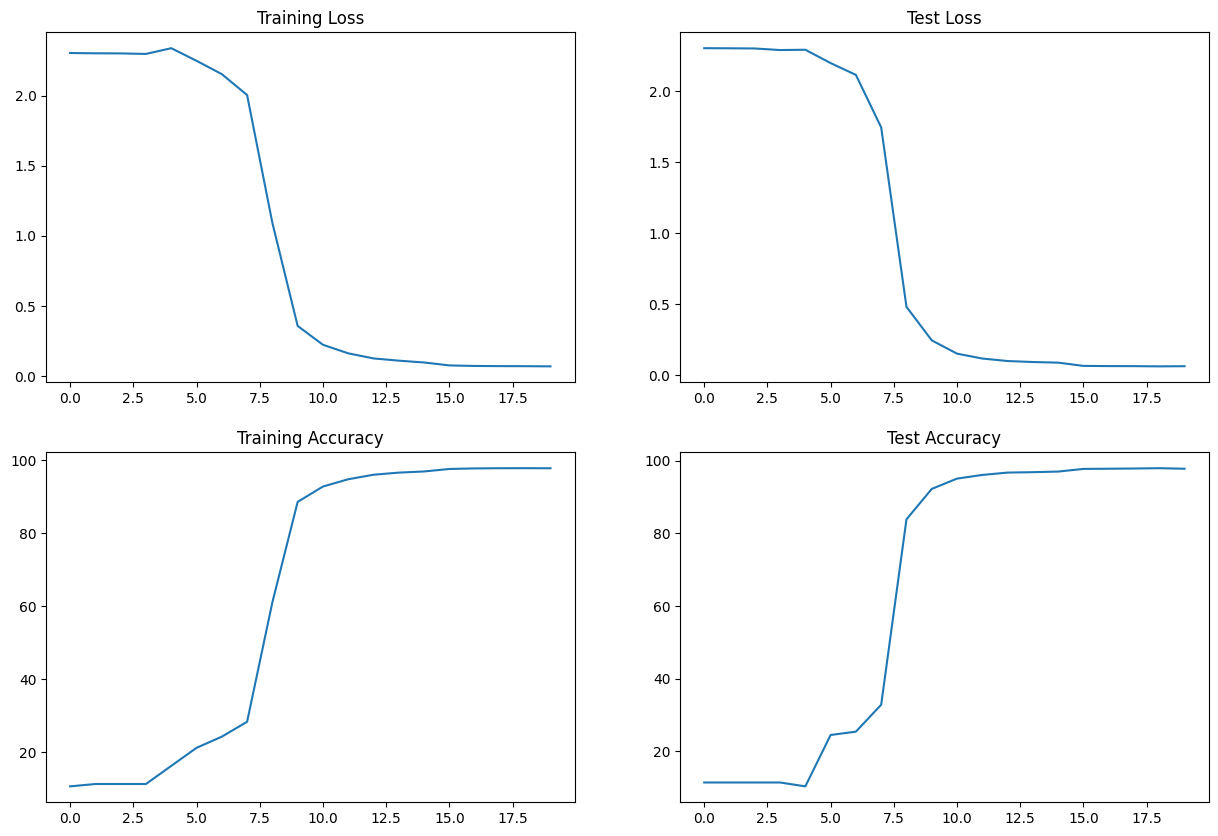

In [8]:
utils.printModelTrainTestAccuracy(train_acc, train_losses, test_acc, test_losses)